In [1]:
%matplotlib inline
from astropy.table import Table, join
import matplotlib.pyplot as plt
import numpy as np

import Euclid

%erun Phosphoros 1.2.0

from PhzCLI.PlotSpecZComparison import SpeczPhotozPlot, displayHistogram, compute_stats

In [2]:
mer = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/MerFileNormalizer/output_mer_cat.fits')
mer.rename_column('TU_OBJECT_ID', 'SOURCE_ID')
truth = Table.read('/home/aalvarez/Work/Data/SC8/TU/MarcoTU/TU_GAL.fits')[['SOURCE_ID', 'Z_OBS']]

tu = join(mer, truth, 'SOURCE_ID')

In [3]:
original = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/Nnpz/develop.fits', hdu=1)
bins = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/Nnpz/develop.fits', hdu=2)['BINS_PDF']

In [4]:
refactor = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/Nnpz/cpp.fits', hdu=1)
bins2 = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod_18oct2021/Nnpz/refactor.fits', hdu=2)['BINS_PDF']

In [5]:
[c for c in original.colnames if c not in refactor.colnames]

['FLAGS_1']

In [6]:
np.array_equal(original['OBJECT_ID'], refactor['OBJECT_ID'])

True

In [7]:
diff_flags = ~np.equal(original['FLAGS_1'], refactor['FLAGS'])
diff_flags.sum(), len(refactor)

(377, 92047)

In [8]:
original_j = join(original, tu, 'OBJECT_ID')
refactor_j = join(refactor, tu, 'OBJECT_ID')

In [9]:
_ = compute_stats(original_j['Z_OBS'], original_j['REDSHIFT_MEAN'])

--> Mean                :  -0.007175062975821088
--> Median              :  -0.003885477315634489
--> Sigma               :  0.07014684841388379
--> Mad                 :  0.021915186196565628
--> Outliers            :  3.915518664986311 %
--> Sigma (no outliers) :  0.029041056


In [10]:
_ = compute_stats(refactor_j['Z_OBS'], refactor_j['REDSHIFT_MEAN'])

--> Mean                :  -0.007272095927167106
--> Median              :  -0.00390161
--> Sigma               :  0.0699608929540441
--> Mad                 :  0.021811191
--> Outliers            :  3.900308548085698 %
--> Sigma (no outliers) :  0.0289502


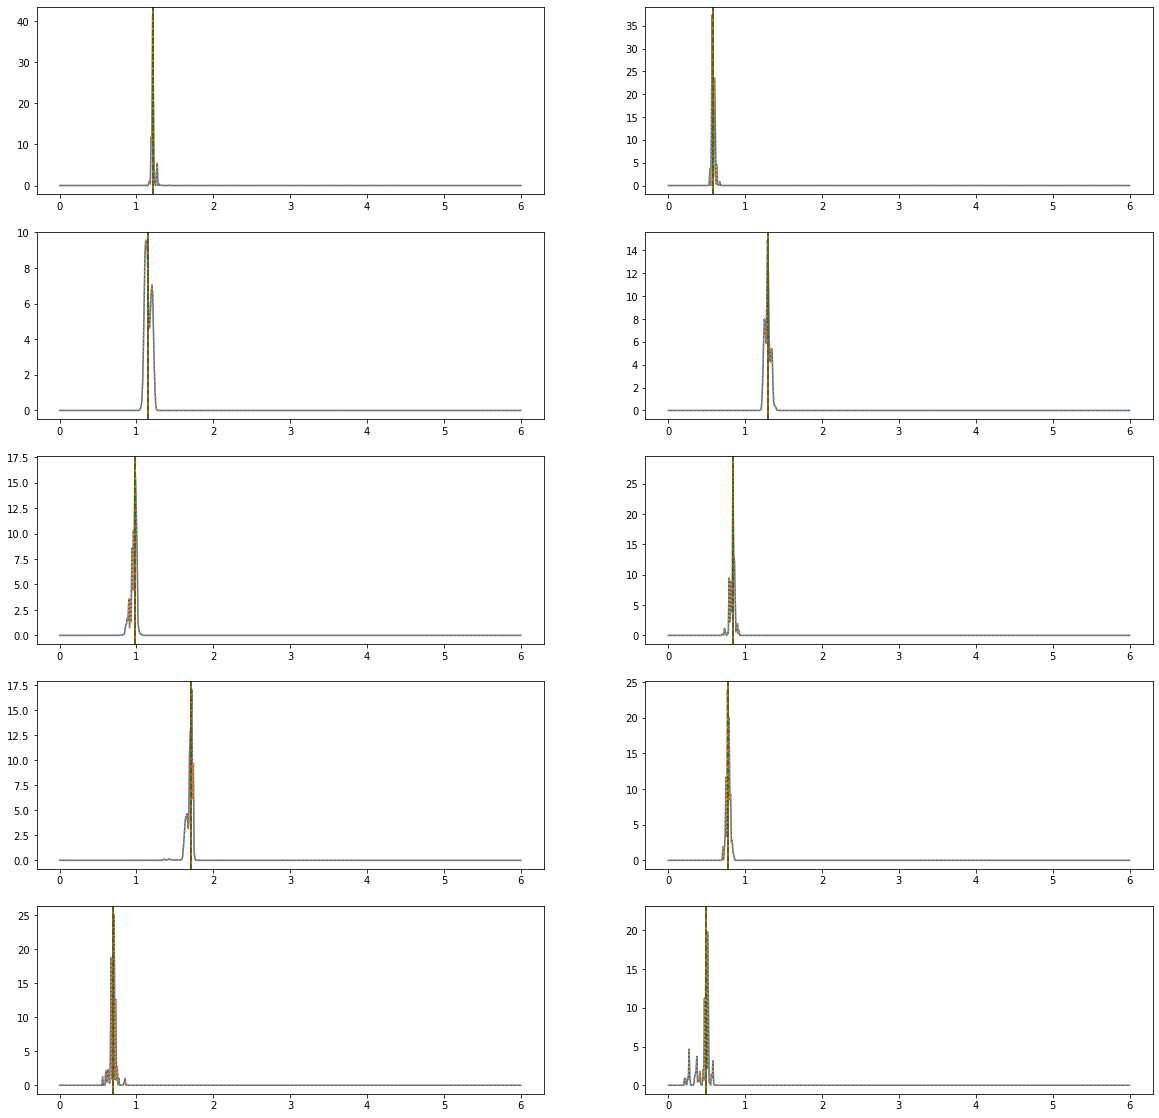

In [11]:
idx = np.random.choice(len(refactor), 10)

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20,20))

for i, ax in zip(idx, axes.ravel()):
    assert original['OBJECT_ID'][i] == refactor['OBJECT_ID'][i]
    ax.plot(bins, original['REDSHIFT_PDF'][i], linestyle='-')
    ax.axvline(original['REDSHIFT_MEDIAN'][i], c='red')
    ax.plot(bins2, refactor['REDSHIFT_PDF'][i], linestyle=':')
    ax.axvline(refactor['REDSHIFT_MEDIAN'][i], c='green', linestyle='--')

In [12]:
uniform = [
    'FLUX_U_LSST_UNIF_LSST_U', 'FLUX_U_LSST_UNIF_LSST_G',
    'FLUX_G_LSST_UNIF_LSST_G', 'FLUX_R_LSST_UNIF_LSST_R',
    'FLUX_I_LSST_UNIF_LSST_I', 'FLUX_H_TOTAL_UNIF',
    'FLUX_VIS_TOTAL_UNIF', 'FLUX_Y_TOTAL_UNIF'
]

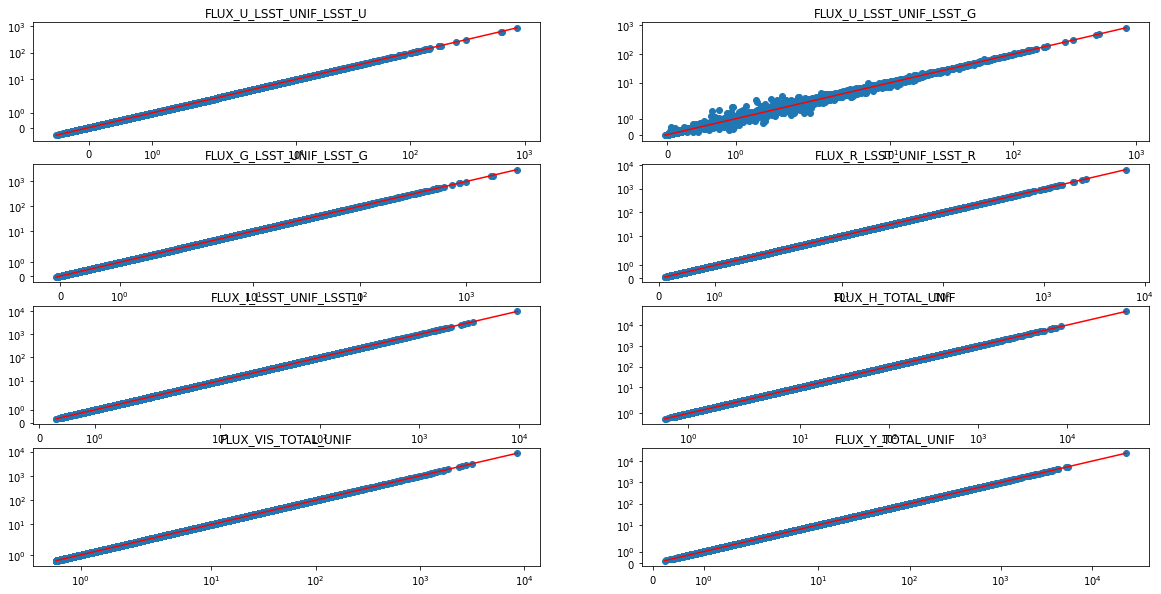

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=len(uniform)//2, figsize=(20, 10))
for u, ax in zip(uniform, axes.ravel()):
    ax.set_title(u)
    ax.scatter(original[u], refactor[u])
    corner = [np.min(original[u]), np.max(original[u])]
    ax.plot(corner, corner, color='red')
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')